## wine dataset
### Reference
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine

In [9]:
wine = load_wine()
data = wine.data
print(len(data[0]))
print(data)

13
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [8]:
# choose two features and create data
def create_data(start, end):
    wine = load_wine()
    data = wine.data
    data1 = data[:, start:start+1]
    data2 = data[:, end:end+1]
    data = np.concatenate([data1, data2], 1)
    return data
print(create_data(2, 4))

[[  2.43 127.  ]
 [  2.14 100.  ]
 [  2.67 101.  ]
 [  2.5  113.  ]
 [  2.87 118.  ]
 [  2.45 112.  ]
 [  2.45  96.  ]
 [  2.61 121.  ]
 [  2.17  97.  ]
 [  2.27  98.  ]
 [  2.3  105.  ]
 [  2.32  95.  ]
 [  2.41  89.  ]
 [  2.39  91.  ]
 [  2.38 102.  ]
 [  2.7  112.  ]
 [  2.72 120.  ]
 [  2.62 115.  ]
 [  2.48 108.  ]
 [  2.56 116.  ]
 [  2.28 126.  ]
 [  2.65 102.  ]
 [  2.36 101.  ]
 [  2.52  95.  ]
 [  2.61  96.  ]
 [  3.22 124.  ]
 [  2.62  93.  ]
 [  2.14  94.  ]
 [  2.8  107.  ]
 [  2.21  96.  ]
 [  2.7  101.  ]
 [  2.36 106.  ]
 [  2.36 104.  ]
 [  2.7  132.  ]
 [  2.65 110.  ]
 [  2.41 100.  ]
 [  2.84 110.  ]
 [  2.55  98.  ]
 [  2.1   98.  ]
 [  2.51 128.  ]
 [  2.31 117.  ]
 [  2.12  90.  ]
 [  2.59 101.  ]
 [  2.29 103.  ]
 [  2.1  107.  ]
 [  2.44 111.  ]
 [  2.28 102.  ]
 [  2.12 101.  ]
 [  2.4  103.  ]
 [  2.27 108.  ]
 [  2.04  92.  ]
 [  2.6   94.  ]
 [  2.42 111.  ]
 [  2.68 115.  ]
 [  2.25 118.  ]
 [  2.46 116.  ]
 [  2.3  118.  ]
 [  2.68 102.  ]
 [  2.5  108. 

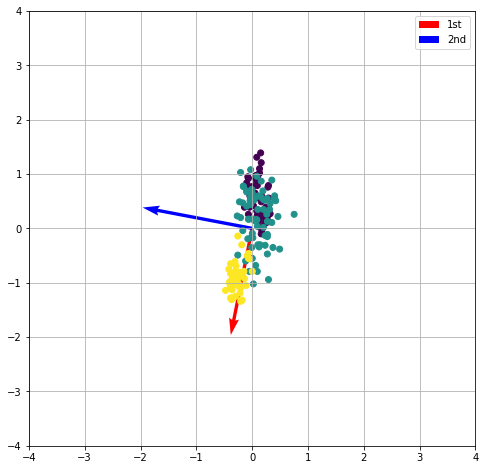

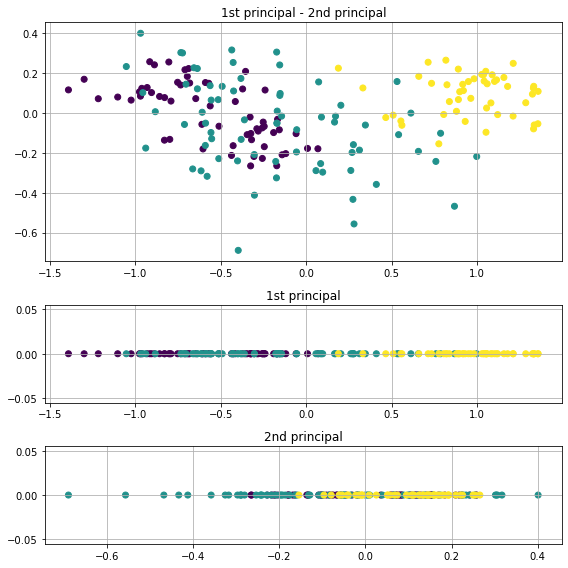

In [11]:
def pca_use_org(data):
    # ##################### 主成分分析 ########################
    # 共分散行列を求める
    cov_matrix = np.cov(data, rowvar=False)

    # 固有値と固有ベクトルを取得する
    l, v = np.linalg.eig(cov_matrix)

    # 固有値を大きい順に並べる
    l_index = np.argsort(l)[::-1]
    l_ = l[l_index]
    v_ = v[:, l_index]

    # 固有ベクトルを使ってデータを変換する
    data_trans = np.dot(data, v_)

    return data_trans, v_


if __name__ == "__main__":
    # ###################### データ作成 ########################
    # データセットから2次元データを切り出す
#     d_index = [0, 2]
#     wine = load_wine()
#     data = wine.data
#     data = data[:, d_index]
# choose feature between 0 and 12
    data = create_data(10, 11)

    # データ全体の平均を0にする
#     print('data=', data)
    data -= data.mean(axis=0)
#     print('data=', data)

    # #################### 主成分分析開始 #######################
    # 自作関数(numpyはその限りではない)でPCA
    data_trans, v = pca_use_org(data)

    # ###################### 作図準備 ###########################
    # 変換軸となるベクトルを描画用の変数に格納
    vec_s = [0, 0]
    vec_1st_e = [2*v[0, 0], 2*v[0, 1]]
    vec_2nd_e = [2*v[1, 0], 2*v[1, 1]]

    # ######################## 作図開始 ########################
    # -------------------- 変換前データと変換軸ベクトル ---------
    plt.figure(figsize=[8, 8])
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.quiver(vec_s[0], vec_s[1], vec_1st_e[0], vec_1st_e[1],
               angles='xy', scale_units='xy', scale=1, color='r', label='1st')
    plt.quiver(vec_s[0], vec_s[1], vec_2nd_e[0], vec_2nd_e[1],
               angles='xy', scale_units='xy', scale=1, color='b', label='2nd')
    plt.grid()
    plt.legend()
    plt.scatter(data[:, 0], data[:, 1], c=wine.target)
    plt.savefig('charts/fig-3.png')

    # -------------- 変換後データ、第1主成分、第2主成分 ---------
    plt.figure(figsize=[8, 8])
    plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    plt.title('1st principal - 2nd principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], data_trans[:, 1], c=wine.target)
    plt.subplot2grid((4, 1), (2, 0))
    plt.tick_params(labelleft="off", left="off")
    plt.title('1st principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], np.zeros(len(data_trans[:, 0])), c=wine.target)
    plt.subplot2grid((4, 1), (3, 0))
    plt.title('2nd principal')
    plt.grid()
    plt.tick_params(labelleft="off", left="off")
    plt.scatter(data_trans[:, 1], np.zeros(len(data_trans[:, 1])), c=wine.target)
    plt.tight_layout()
    plt.show()